In [8]:
#Sentiment Analysis with Textblob for german texts.
import pandas as pd
from textblob import TextBlob
from textblob_de import TextBlobDE as TextBlob

In [10]:
df = pd.read_csv("dataset_P+R.csv")
cols = ['Lage', 'WG-Leben', 'Sonstiges']
df['Description'] = df[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)
df.to_csv("./try.csv", sep=',', index=False)

In [11]:
sentiment_df = df.drop(["Unnamed: 10", "ga_last_name"], axis=1)
sentiment_df.head(5)

,Name,Title,URL,Die_WG,Gesucht_wird,Adresse,Zimmer,Lage,WG-Leben,Sonstiges,ga_first_name,ga_gender,ga_accuracy,ga_samples,Description
0,Katrin Mangold,WG-Zimmer frei in Studentenhäuschen mit Flair ...,https://www.wg-gesucht.de/wg-zimmer-in-Passau-...,;12m² Zimmer in 7er WG;;7er WG ( 3 Frauen und ...,Geschlecht egal zwischen 18 und 26 Jahren,Klausenweg 2 94034 Passau Hacklberg,In diesem netten Studentenhäuschen (Baujahr 19...,none,none,none,Katrin,female,98.0,6642.0,none_none_none
1,Chiara Wiedemeier,Wunderschönes WG Zimmer mit seperaten Arbeitsb...,https://www.wg-gesucht.de/wg-zimmer-in-Passau-...,;25m² Zimmer in 2er WG;Wohnungsgröße: 86m²;2er...,Geschlecht egal zwischen 18 und 28 Jahren,"Kremser Str, 26 94032 Passau Innstadt",Ich gehe für ein Semester ins Ausland und würd...,Obwohl am Rand der Innstand ist die Lage hervo...,Die WG wirt zu dem Zeitpunkt aus meiner Mitbew...,Das Zimmer wird komplett möbeliert abgegeben. ...,Chiara,female,99.0,25764.0,Obwohl am Rand der Innstand ist die Lage hervo...
2,Katrin Mangold,WG-Zimmer frei in einem netten Studentenhäusch...,https://www.wg-gesucht.de/wg-zimmer-in-Passau-...,;22m² Zimmer in 7er WG;;7er WG ( 3 Frauen und ...,Geschlecht egal zwischen 18 und 28 Jahren,Klausenweg 2 94034 Passau Hacklberg,In diesem netten Studentenhäuschen (Baujahr 19...,none,none,none,Katrin,female,98.0,6642.0,none_none_none
3,Sophia Weber,Schönes Zimmer in großer WG,https://www.wg-gesucht.de/wg-zimmer-in-Passau-...,;17m² Zimmer in 9er WG;;9er WG ( 2 Frauen und ...,Geschlecht egal zwischen 18 und 30 Jahren,Giselastraße 1 94032 Passau Haidenhof-Süd,"Dein Zimmer ist im Erdgeschoss, dadurch bist d...",Zur Uni sind es nicht mehr als 10 Minuten (auc...,"Wir sind eine sehr aufgeschlossene, offene leb...","Bei uns werden gleich mehrere Zimmer frei, dah...",Sophia,female,98.0,12814.0,Zur Uni sind es nicht mehr als 10 Minuten (auc...
4,Sven,"Zentral, möbliert &amp; super Ausblick 🤩",https://www.wg-gesucht.de/wg-zimmer-in-Passau-...,;24m² Zimmer in 2er WG;Wohnungsgröße: 51m²;2er...,Geschlecht egal,Angerstraße 94034 Passau Altstadt,"Das gemütliche, große und helle Zimmer mit 24 ...","Das Stadtzentrum, der Busbahnhof und die Unive...",Die super netten Mitbewohner im Haus teilen si...,Für Fragen oder eine Wohnungsbesichtigung freu...,Sven,male,99.0,19537.0,"Das Stadtzentrum, der Busbahnhof und die Unive..."


In [13]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\admin.hossain-
[nltk_data]     tithy\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [14]:
sentiment_df["polarity"] = sentiment_df.apply(lambda x: TextBlob(x["Description"]).sentiment.polarity, axis=1)
sentiment_df["subjectivity"] = sentiment_df.apply(lambda x: TextBlob(x["Description"]).sentiment.subjectivity, axis=1)
sentiment_df.tail(50)

,Name,Title,URL,Die_WG,Gesucht_wird,Adresse,Zimmer,Lage,WG-Leben,Sonstiges,ga_first_name,ga_gender,ga_accuracy,ga_samples,Description,polarity,subjectivity
148,Robert Escherich,Zimmer zur Zwischenmiete in Regensburger Altstadt,https://www.wg-gesucht.de/wg-zimmer-in-Regensb...,;18m² Zimmer in 3er WG;Wohnungsgröße: 89m²;3er...,Geschlecht egal zwischen 20 und 30 Jahren,"Deischgasse, 2 93047 Regensburg Innenstadt","Hallo zusammen, Wir suchen eine/n neue/n Mitbe...",LageUnsere WG befindet sich in Mitten der Alts...,"Nun zu uns:Wir sind eine ruhige, unkompliziert...",Andere Nebenleistungen:Es steht eine 100 Mbit ...,Robert,male,99.0,145540.0,LageUnsere WG befindet sich in Mitten der Alts...,0.373529,0.000000
149,C. Malong,WG Zimmer in Hausgemeinschaft mit großem Garten,https://www.wg-gesucht.de/wg-zimmer-in-Regensb...,;17m² Zimmer in 3er WG;;3er WG ( 1 Frau und 1 ...,Geschlecht egal,Kuglerstraße 13 93049 Regensburg Westenviertel,Liebe WG-Sucher*innen! Das Zimmer um das es si...,Unsere WG liegt direkt gegenüber vom Krankenha...,"Unsere WG besteht aktuell aus Michel, Leila u...",Wenn ihr euch angesprochen fühlt und Lust auf ...,C.,male,59.0,943.0,Unsere WG liegt direkt gegenüber vom Krankenha...,0.498958,0.062500
150,Leonard,Drei Zimmer in WG Neugründung in schönem Haus ...,https://www.wg-gesucht.de/wg-zimmer-in-Regensb...,;14m² Zimmer in 5er WG;Wohnungsgröße: 130m²;5e...,Geschlecht egal zwischen 18 und 29 Jahren,Erikaweg 74 93053 Regensburg Kasernenviertel,"Hey ihr Lieben, wir (Marco 21, Lehramtstudent;...",none,"Zu uns: Wir sind 2 sehr entspannte Leute, die ...",none,Leonard,male,98.0,7077.0,"none_Zu uns: Wir sind 2 sehr entspannte Leute,...",0.271429,0.000000
151,Ignacio Nasri,👉🏠15 m2 Zimmer in tolles WG in der Innenstadt!...,https://www.wg-gesucht.de/wg-zimmer-in-Regensb...,;15m² Zimmer in 7er WG;Wohnungsgröße: 120m²;7e...,Geschlecht egal zwischen 18 und 35 Jahren,"Trothengasse 6, 2 Etage 93047 Regensburg Innen...",ZimmerUnsere Wohnung liegt im zweiten Obergesc...,Unsere Wohnung liegt höchstens drei Minuten zu...,"Da im ganzen Haus coole Leute wohnen, verstehe...",none,Ignacio,male,99.0,11529.0,Unsere Wohnung liegt höchstens drei Minuten zu...,0.425000,0.000000
152,Josef,Zimmer in 2er WG am Neupfarrplatz,https://www.wg-gesucht.de/wg-zimmer-in-Regensb...,;13m² Zimmer in 2er WG;;2er WG ( 1 Mann );Bewo...,Geschlecht egal ab 22 Jahren,Augustinerplatz 1a 93047 Regensburg Innenstadt,Wohnung ist im 4. Stock. Aufzug ist vorhanden....,Innenstadt.,"Nachdem ich zuerst am Stadtrand gewohnt habe, ...",Das Zimmer steht auf unbefristete Zeit zur Ver...,Josef,male,98.0,26385.0,Innenstadt._Nachdem ich zuerst am Stadtrand ge...,0.295000,0.200000
153,Anja Siegert,Zimmer in entspannter 4er WG,https://www.wg-gesucht.de/wg-zimmer-in-Regensb...,;18m² Zimmer in 4er WG;Wohnungsgröße: 122m²;4e...,Geschlecht egal zwischen 25 und 35 Jahren,Maximilianstraße 93047 Regensburg Innenstadt,"Unsere große, kernsanierte Altbauwohnung beste...",Unsere Wohnung hat die perfekte Lage am oberen...,Deine zukünftigen Mitbewohner:innen sind Phili...,Wir freuen uns auf dich :) Schicke uns gerne e...,Anja,female,98.0,11999.0,Unsere Wohnung hat die perfekte Lage am oberen...,0.264286,0.000000
154,Sarah,schönes WG Zimmer zur Zwischenmiete in Uninähe,https://www.wg-gesucht.de/wg-zimmer-in-Regensb...,;20m² Zimmer in 3er WG;Wohnungsgröße: 80m²;3er...,Frau zwischen 18 und 30 Jahren,Griesbacherstraße 93053 Regensburg Galgenberg,Das Zimmer ist gegen Süden ausgerichtet und mi...,Die OTH und die Uni sind mit dem Fahrrad in 5–...,Ich gehe für ein Semester ins Ausland und möch...,Wenn du denkst es könnte passen dann melde dic...,Sarah,female,98.0,127402.0,Die OTH und die Uni sind mit dem Fahrrad in 5–...,0.337500,0.000000
155,Hannah,2 Zimmer in Traum-WG an den Acarden,https://www.wg-gesucht.de/wg-zimmer-in-Regensb...,;13m² Zimmer in 4er WG;Wohnungsgröße: 100m²;4e...,Geschlecht egal zwischen 20 und 30 Jahren,Furtmayrstraße 6 93053 Regensburg Galgenberg,Schweren Herzens verlasse ich mein WG

In [15]:
sentiment_df.groupby('ga_gender')['polarity'].describe()


,count,mean,std,min,25%,50%,75%,max
ga_gender,,,,,,,,
female,114.0,0.315583,0.193031,-0.116667,0.212731,0.330865,0.435142,1.000000
male,82.0,0.312042,0.194668,0.000000,0.203472,0.339683,0.439583,0.880000
none,2.0,0.543333,0.174420,0.420000,0.481667,0.543333,0.605000,0.666667


<Axes: title={'center': 'polarity'}, xlabel='ga_gender'>

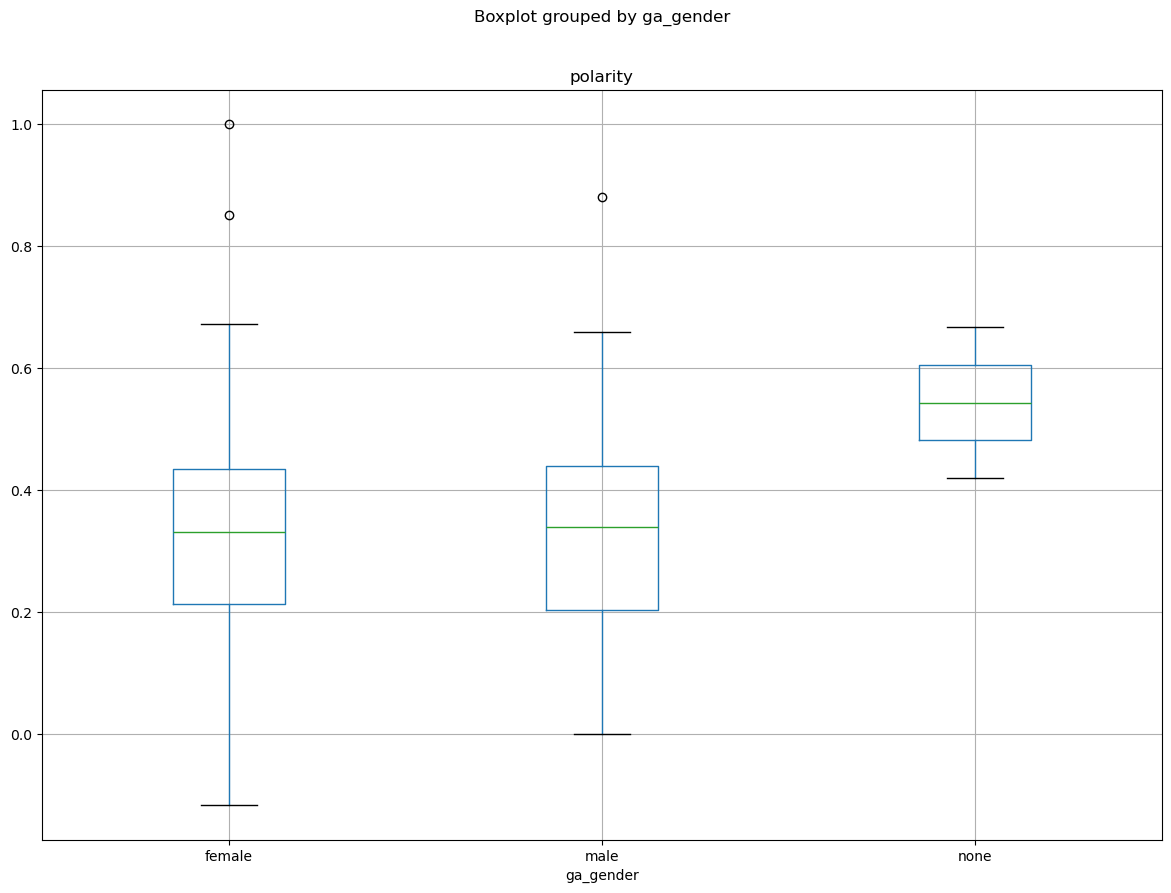

In [16]:
sentiment_df.boxplot(by='ga_gender', column='polarity', figsize=(14,10))


In [17]:
sentiment_df.groupby('ga_gender')['subjectivity'].describe()


,count,mean,std,min,25%,50%,75%,max
ga_gender,,,,,,,,
female,114.0,0.046795,0.074765,0.0,0.000000,0.000000,0.072403,0.333333
male,82.0,0.044843,0.061246,0.0,0.000000,0.000000,0.075549,0.200000
none,2.0,0.166667,0.235702,0.0,0.083333,0.166667,0.250000,0.333333


<Axes: title={'center': 'subjectivity'}, xlabel='ga_gender'>

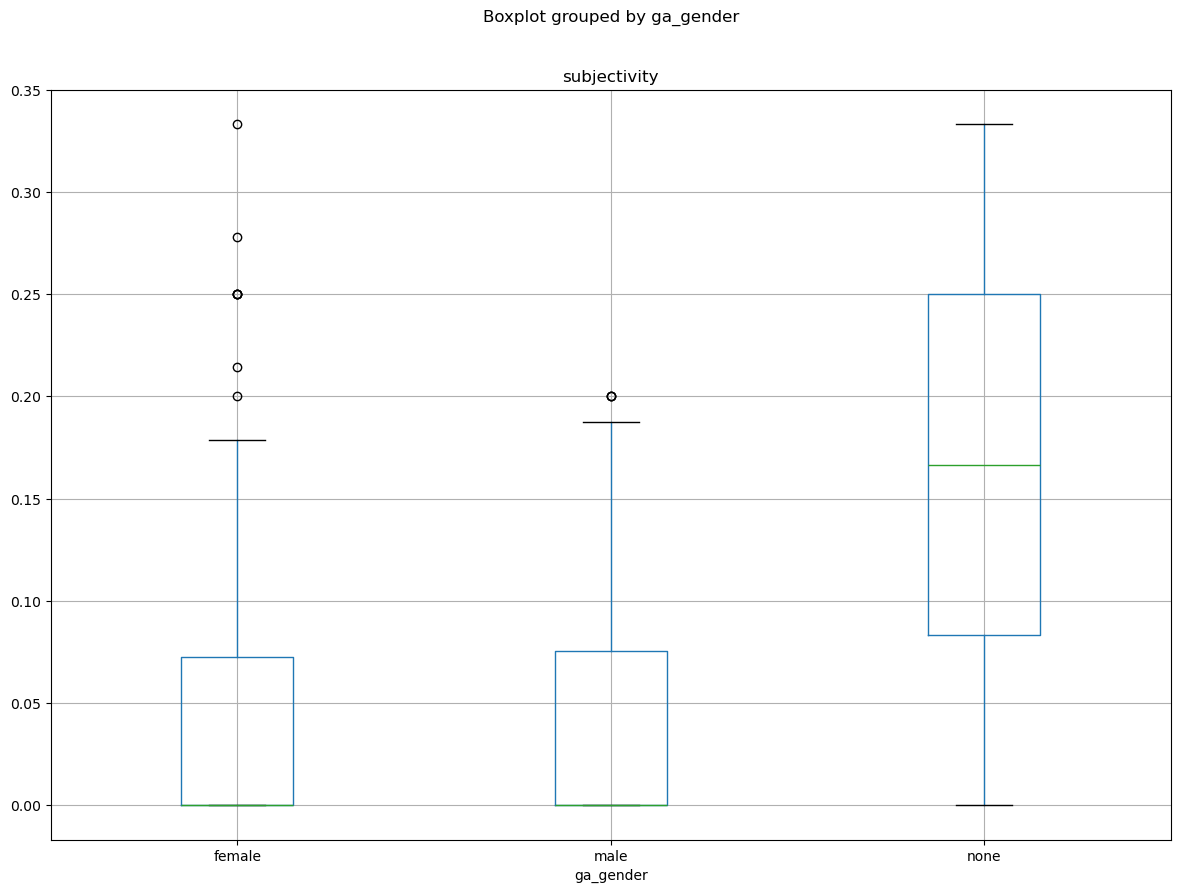

In [18]:
sentiment_df.boxplot(by='ga_gender', column='subjectivity', figsize=(14,10))


**Statistical testing with Shapiro-Wilk test and Mann-Whitney U test**

In [19]:
#Dataframe created by taking 10 male and female samples with polarity scores.
import pandas as pd

# putting data in to a dictionary
data = {'female':[0.456250, 0.175000, 0.186364, 0.121429, -0.116667, 0.400000, 0.375000, 0.378571, 0.262500, 0.494000],
        'male':  [0.200000, 0.340000, 0.243000, 0.242424, 0.533333, 0.413333, 0.585185, 0.428571, 0.378125, 0.379167]}

# Dictionary to Dataframe
df = pd.DataFrame(data)
df

,female,male
0,0.456250,0.200000
1,0.175000,0.340000
2,0.186364,0.243000
3,0.121429,0.242424
4,-0.116667,0.533333
5,0.400000,0.413333
6,0.375000,0.585185
7,0.378571,0.428571
8,0.262500,0.378125
9,0.494000,0.379167


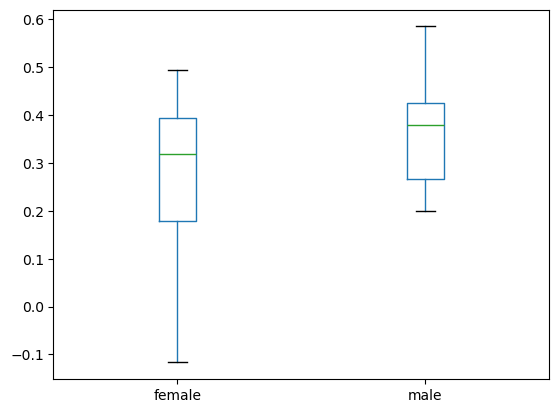

In [20]:
#Box-plot with polarity values.
import matplotlib.pyplot as plt
df.boxplot(column=['female', 'male'], grid=False)
plt.show()

In [21]:
#Shapiro-Wilk test for female group
import scipy.stats as stats
w, pvalue = stats.shapiro(df['female'])
w, pvalue

(0.9232951998710632, 0.3852595388889313)

In [22]:
#Shapiro-Wilk test for male group
w, pvalue = stats.shapiro(df['male'])
w, pvalue

(0.9511487483978271, 0.682104766368866)

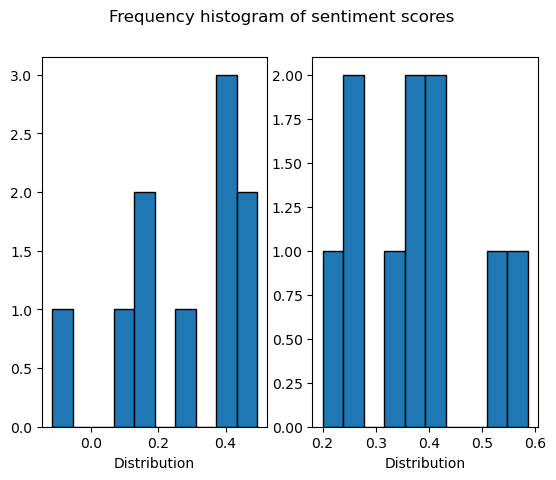

In [24]:
# plot histograms for females and males showing w (y axis) and pvalues(x axis).
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Frequency histogram of sentiment scores')
ax1.hist(df['female'], bins=10, histtype='bar', ec='k') 
ax2.hist(df['male'], bins=10, histtype='bar', ec='k') 
ax1.set_xlabel("Distribution")
ax2.set_xlabel("Distribution")
plt.show()

In [25]:
#mann whitney u test.
import scipy.stats as stats
# perform two-sided test. You can use 'greater' or 'less' for one-sided test
stats.mannwhitneyu(x=df['female'], y=df['male'], alternative = 'two-sided')

MannwhitneyuResult(statistic=34.0, pvalue=0.24132159301718004)

In [26]:
#mann whitney u test.
import scipy.stats as stats
stats.mannwhitneyu(x=df['male'], y=df['female'], alternative = 'greater')

MannwhitneyuResult(statistic=66.0, pvalue=0.12066079650859002)

In [27]:
#Dataframe created by taking 10 male and female samples with subjectivity scores.
import pandas as pd

# putting data in to a dictionary
data = {'female':[0.031250, 0.178571, 0.114286, 0.250000, 0.100000, 0.083333, 0.157895, 0.035714, 0.125000, 0.086957 ],
        'male':  [0.058824, 0.052632, 0.064815, 0.062500, 0.200000, 0.060606, 0.148148, 0.033333, 0.153846, 0.111111]}

# Dictionary to Dataframe
df = pd.DataFrame(data)
df

,female,male
0,0.031250,0.058824
1,0.178571,0.052632
2,0.114286,0.064815
3,0.250000,0.062500
4,0.100000,0.200000
5,0.083333,0.060606
6,0.157895,0.148148
7,0.035714,0.033333
8,0.125000,0.153846
9,0.086957,0.111111


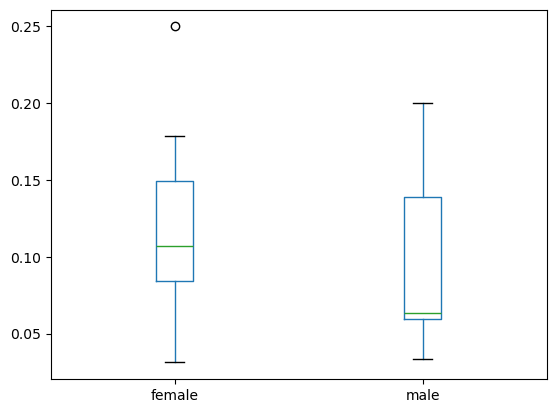

In [28]:
#Box-plot with subjectivity values.
import matplotlib.pyplot as plt
df.boxplot(column=['female', 'male'], grid=False)
plt.show()

In [29]:
#Shapiro-Wilk test for female group
import scipy.stats as stats
w, pvalue = stats.shapiro(df['female'])
w, pvalue

(0.9499768018722534, 0.6682268381118774)

In [30]:
#Shapiro-Wilk test for female group
import scipy.stats as stats
w, pvalue = stats.shapiro(df['male'])
w, pvalue

(0.8624064326286316, 0.08145499974489212)

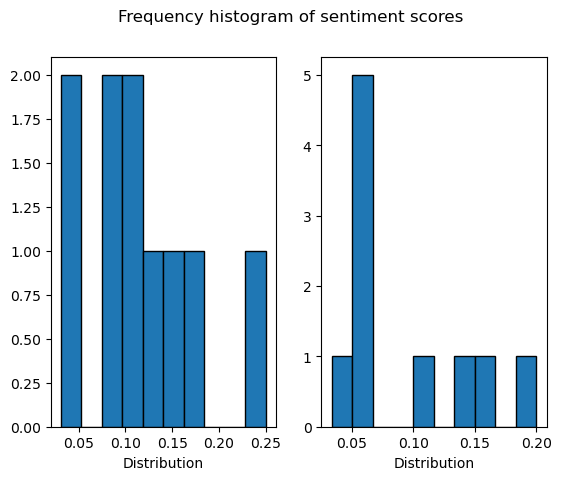

In [31]:
# plot histograms for females and males showing w (y axis) and pvalues(x axis).
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Frequency histogram of sentiment scores')
ax1.hist(df['female'], bins=10, histtype='bar', ec='k') 
ax2.hist(df['male'], bins=10, histtype='bar', ec='k') 
ax1.set_xlabel("Distribution")
ax2.set_xlabel("Distribution")
plt.show()

In [32]:
#mann whitney u test.
import scipy.stats as stats
# perform two-sided test. You can use 'greater' or 'less' for one-sided test
stats.mannwhitneyu(x=df['female'], y=df['male'], alternative = 'two-sided')

MannwhitneyuResult(statistic=61.0, pvalue=0.4273553138978077)

In [33]:
#mann whitney u test.
import scipy.stats as stats
stats.mannwhitneyu(x=df['female'], y=df['male'], alternative = 'greater')

MannwhitneyuResult(statistic=61.0, pvalue=0.21367765694890384)